# CytoscapeとIPython Notebookの連携

![](https://raw.githubusercontent.com/idekerlab/cyREST/master/docs/images/logo300.png)

### Part 1: 基本機能の紹介

by Keiichiro Ono
* Mail: kono at ucsd edu
* Twitter: [c_z](https://twitter.com/c_z)

このノートブックの詳細は[こちらの記事]()をお読みください。

## 初期設定

In [1]:
from py2cytoscape.data.cyrest_client import CyRestClient

cy = CyRestClient(ip='127.0.0.1', port=1234)

# 現在のセッションのクリア
cy.session.delete()

## NetworkXによるスケールフリーネットワークの生成

In [2]:
import networkx as nx
g = nx.scale_free_graph(500)

## 各種統計量の計算

In [3]:
deg = nx.degree(g)
btw = nx.betweenness_centrality(g)

nx.set_node_attributes(g, 'degree', deg)
nx.set_node_attributes(g, 'betweenness', btw)

## Cytoscapeで描画

In [4]:
g_cy = cy.network.create_from_networkx(g)

## レイアウト

In [5]:
cy.layout.apply(name='kamada-kawai', network=g_cy)

## スタイルの適用

In [6]:
directed = cy.style.create('Directed')
cy.style.apply(directed, network=g_cy)

## 見やすいようにエッジを束ねる

In [7]:
result = cy.edgebundling.apply(g_cy)

## 画像を取得する

### PNG

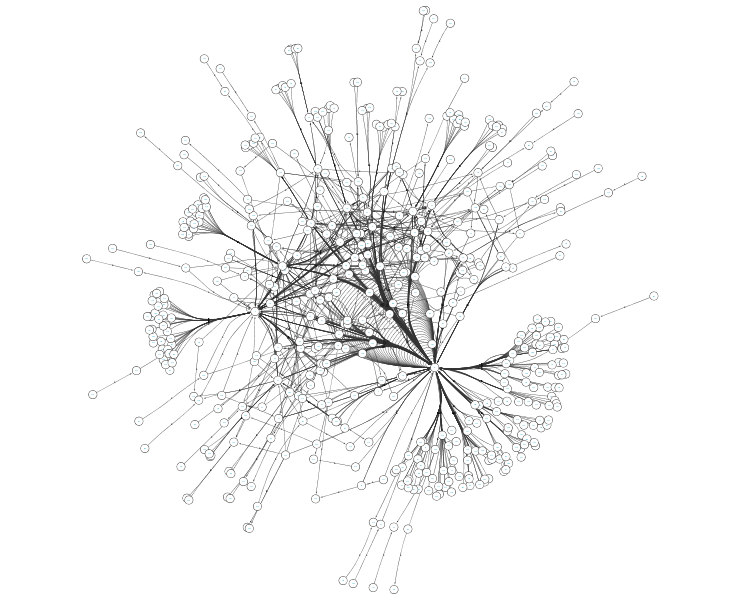

In [13]:
network_png = g_cy.get_png()

from IPython.display import Image
Image(network_png)

### SVG

In [16]:
network_svg = g_cy.get_svg()

from IPython.display import SVG
SVG(network_svg)

### PDF

In [15]:
network_pdf = g_cy.get_pdf()

# ファイルに保存
f = open('scale_free_500.pdf', 'wb')
f.write(network_pdf)
f.close()

## JavaScriptを使ったインタラクティブな描画

In [11]:
import py2cytoscape.cytoscapejs as renderer

view = g_cy.get_first_view()
# style_for_widget = cy.style.get(my_yeast_style.get_name(), data_format='cytoscapejs')
renderer.render(view, 'Directed', background='radial-gradient(#FFFFFF 15%, #DDDDDD 105%)')

<IPython.core.display.Javascript object>